# Genesis Token Distribution

In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


import re
import json


In [252]:
data = []

with open('data.json') as json_file:

    file = json.load(json_file)

    for line in file:
        output = {}

        output["name"] = line['name']
        output["Relay chain"] = line['relay_chain']
        output["Market supply"] = line['market_supply']
        output["Circulation supply"] = line['circulation_supply']
        output["Market cap"] = line['market_cap']

        for k in line["token_distribution"]:
            output[k[0]] = k[1]

        data.append(output)

df = pd.DataFrame(data)
df.fillna(0, inplace=True)

df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,tokenomics,Auction&Liquidity,EcosystemDev,FoundationReserver,Backers,...,AuctionIncentives,PCXHolders,CIDNFTMining,Council,Giveaway,Incubator&Advisor,Treasure&Reserves,Ecosystem&DevCommunity,ProtocolReserve,StrategicPartners&Advisors
0,Dora Factory,Kusama,0,0,0,0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,117083965,current,34.0,5.0,10.76,11.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pichiu,Kusama,10500000105,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Genshiro,Kusama,1200000000,8164417,150000000125,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Equilibrium,Polkadot,1100000000917,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Nodle,Polkadot,850000000405,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Calamari Network,Kusama,10000000000,1596339367,4341913,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
new_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

new_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap
0,Dora Factory,Kusama,0,0,0
1,Acala,Polkadot,1000000000,437461795,117083965
2,Pichiu,Kusama,10500000105,0,0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360
4,Genshiro,Kusama,1200000000,8164417,150000000125
5,Equilibrium,Polkadot,1100000000917,0,0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463
7,Nodle,Polkadot,850000000405,0,0
8,Calamari Network,Kusama,10000000000,1596339367,4341913
9,Bit.Country Pioneer,Kusama,1500000015,0,0


# Filter out the categories in the new categories list

In [254]:
categories = pd.read_csv('GenesisTokensAnalysis-scrapedcategories.csv')

print(categories)

                  Scraped Label   Category   Subcategory
0                  EcosystemDev    Budgets     Ecosystem
1            FoundationReserver    Reserve       Reserve
2                       Backers  Investors  Second Round
3                  FoundingTeam   Founders      Founders
4                  EarlyBackers  Investors    Seed Round
..                          ...        ...           ...
257                     Council   Founders      Founders
258                    Giveaway    Budgets     Ecosystem
259           Treasure&Reserves    Reserve       Reserve
260             ProtocolReserve    Reserve       Reserve
261  StrategicPartners&Advisors  Investors  Second Round

[262 rows x 3 columns]


In [255]:
categories["Subcategory"].unique()

array(['Ecosystem', 'Reserve', 'Second Round', 'Founders', 'Seed Round',
       'Crowdloan', 'Auctions', 'Community', 'Marketing', 'Liquidity',
       'Developers'], dtype=object)

In [256]:
for Subcategory in categories["Subcategory"].unique():
  new_df[Subcategory] = 0

new_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,117083965,0,0,0,0,0,0,0,0,0,0,0
2,Pichiu,Kusama,10500000105,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,0,0,0,0,0,0,0,0,0,0,0
4,Genshiro,Kusama,1200000000,8164417,150000000125,0,0,0,0,0,0,0,0,0,0,0
5,Equilibrium,Polkadot,1100000000917,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,0,0,0,0,0,0,0,0,0,0,0
7,Nodle,Polkadot,850000000405,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Calamari Network,Kusama,10000000000,1596339367,4341913,0,0,0,0,0,0,0,0,0,0,0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,0,0,0,0,0,0,0,0,0,0,0


In [257]:
# Populate the dataframe with the respective values
categories = pd.read_csv('GenesisTokensAnalysis-scrapedcategories.csv')
new_df["Total"] = 0

for index, row  in categories.iterrows():

  new_df[row["Subcategory"]] += df[row["Scraped Label"]]
  new_df["Total"] += df[row["Scraped Label"]]



new_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers,Total
0,Dora Factory,Kusama,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,117083965,5.0,10.76,11.66,20.25,18.33,0.0,0.0,0.0,0.0,0.0,0.0,66.0
2,Pichiu,Kusama,10500000105,0,0,0.0,0.00,0.00,0.00,0.00,30.0,10.0,20.0,20.0,10.0,10.0,100.0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,34.5,10.00,5.00,20.00,10.00,17.5,0.0,0.0,3.0,0.0,0.0,100.0
4,Genshiro,Kusama,1200000000,8164417,150000000125,0.0,15.00,0.00,0.00,0.00,20.0,0.0,50.0,0.0,15.0,0.0,100.0
5,Equilibrium,Polkadot,1100000000917,0,0,0.0,35.00,0.00,15.00,5.00,10.0,0.0,25.0,0.0,10.0,0.0,100.0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,32.0,10.00,0.00,20.00,15.00,20.0,0.0,0.0,3.0,0.0,0.0,100.0
7,Nodle,Polkadot,850000000405,0,0,60.0,12.00,12.00,10.00,4.50,0.0,0.0,0.0,0.0,0.0,1.5,100.0
8,Calamari Network,Kusama,10000000000,1596339367,4341913,0.0,0.00,0.00,0.00,0.00,0.0,40.0,20.0,5.0,20.0,15.0,100.0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,5.0,27.00,15.49,20.00,17.51,15.0,0.0,0.0,0.0,0.0,0.0,100.0


# Populating the special categories

In [258]:
# Auction&Liquidity
new_df["Auctions"] += df["Auction&Liquidity"]/2
new_df["Total"] += df["Auction&Liquidity"]/2

new_df["Liquidity"] += df["Auction&Liquidity"]/2
new_df["Total"] += df["Auction&Liquidity"]/2

# ParachainandEcosystem
new_df["Crowdloan"] += df["ParachainandEcosystem"]/2
new_df["Total"] += df["ParachainandEcosystem"]/2

new_df["Ecosystem"] += df["ParachainandEcosystem"]/2
new_df["Total"] += df["ParachainandEcosystem"]/2

# Marketing,Ecosystem&Partnerships
new_df["Marketing"] += df["Marketing,Ecosystem&Partnerships"]/2
new_df["Total"] += df["Marketing,Ecosystem&Partnerships"]/2

new_df["Ecosystem"] += df["Marketing,Ecosystem&Partnerships"]/2
new_df["Total"] += df["Marketing,Ecosystem&Partnerships"]/2

# Development&Marketing
new_df["Developers"] += df["Development&Marketing"]/2
new_df["Total"] += df["Development&Marketing"]/2

new_df["Marketing"] += df["Development&Marketing"]/2
new_df["Total"] += df["Development&Marketing"]/2

# MarketingAndEcosystem
new_df["Marketing"] += df["MarketingAndEcosystem"]/2
new_df["Total"] += df["MarketingAndEcosystem"]/2

new_df["Ecosystem"] += df["MarketingAndEcosystem"]/2
new_df["Total"] += df["MarketingAndEcosystem"]/2  

# EcosystemandCommunity
new_df["Ecosystem"] += df["EcosystemandCommunity"]/2
new_df["Total"] += df["EcosystemandCommunity"]/2

new_df["Community"] += df["MarketingAndEcosystem"]/2
new_df["Total"] += df["MarketingAndEcosystem"]/2

# Incubator&Advisor
new_df["Seed Round"] += df["Incubator&Advisor"]/2
new_df["Total"] += df["Incubator&Advisor"]/2

new_df["Founders"] += df["Incubator&Advisor"]/2
new_df["Total"] += df["Incubator&Advisor"]/2 

# Ecosystem&DevCommunity
new_df["Ecosystem"] += df["Ecosystem&DevCommunity"]/2
new_df["Total"] += df["Ecosystem&DevCommunity"]/2

new_df["Community"] += df["Ecosystem&DevCommunity"]/2
new_df["Total"] += df["Ecosystem&DevCommunity"]/2


new_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers,Total
0,Dora Factory,Kusama,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,117083965,5.0,10.76,11.66,20.25,18.33,0.0,17.0,0.0,0.0,17.0,0.0,100.0
2,Pichiu,Kusama,10500000105,0,0,0.0,0.00,0.00,0.00,0.00,30.0,10.0,20.0,20.0,10.0,10.0,100.0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,34.5,10.00,5.00,20.00,10.00,17.5,0.0,0.0,3.0,0.0,0.0,100.0
4,Genshiro,Kusama,1200000000,8164417,150000000125,0.0,15.00,0.00,0.00,0.00,20.0,0.0,50.0,0.0,15.0,0.0,100.0
5,Equilibrium,Polkadot,1100000000917,0,0,0.0,35.00,0.00,15.00,5.00,10.0,0.0,25.0,0.0,10.0,0.0,100.0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,32.0,10.00,0.00,20.00,15.00,20.0,0.0,0.0,3.0,0.0,0.0,100.0
7,Nodle,Polkadot,850000000405,0,0,60.0,12.00,12.00,10.00,4.50,0.0,0.0,0.0,0.0,0.0,1.5,100.0
8,Calamari Network,Kusama,10000000000,1596339367,4341913,0.0,0.00,0.00,0.00,0.00,0.0,40.0,20.0,5.0,20.0,15.0,100.0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,5.0,27.00,15.49,20.00,17.51,15.0,0.0,0.0,0.0,0.0,0.0,100.0


# Data Analysis

In [259]:
non_zero_tokens = new_df[new_df['Total'] != 0.0 ]
gen_tokens = non_zero_tokens[["Market supply", 'Ecosystem', 'Reserve', 'Second Round', 'Founders', 'Seed Round', 'Crowdloan', 'Auctions', 'Community', 'Marketing', 'Liquidity', 'Developers']].copy()
gen = non_zero_tokens[["Market supply", 'Ecosystem', 'Reserve', 'Second Round', 'Founders', 'Seed Round', 'Crowdloan', 'Auctions', 'Community', 'Marketing', 'Liquidity', 'Developers']].copy()


for cat in categories["Subcategory"].unique():
  gen_tokens[cat] = (gen_tokens[cat]/100) * non_zero_tokens["Market supply"].astype(float)
  gen[cat] = (gen[cat]/100)

averages = gen.mean()
non_zero_tokens.head()

/tmp/ipykernel_20205/2927014655.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averages = gen.mean()


([<matplotlib.patches.Wedge at 0x7f562bcdeee0>,
 [Text(0.9271784907114525, 0.5918953001689007, 'Ecosystem'),
  Text(0.036242166988101135, 1.0994027948536456, 'Reserve'),
  Text(-0.6065227357665153, 0.9176765067267997, 'Second Round'),
  Text(-1.0177038713585154, 0.4174671606508594, 'Founders'),
  Text(-1.0699444139399439, -0.25538001307602426, 'Seed Round'),
  Text(-0.7478375049065359, -0.8066839940491983, 'Crowdloan'),
  Text(-0.22858231097871215, -1.075987977213329, 'Auctions'),
  Text(0.34740228818042707, -1.0437009390467193, 'Community'),
  Text(0.7485117344134892, -0.8060584243374115, 'Marketing'),
  Text(0.9660568171186423, -0.5260553450907977, 'Liquidity'),
  Text(1.090564380613361, -0.1437683266140247, 'Developers')])

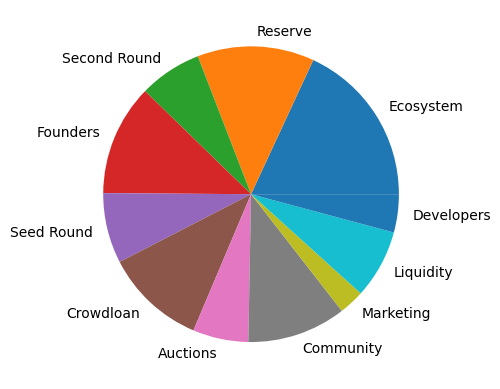

In [260]:
plt.pie(averages, labels=averages.index)